<a href="https://colab.research.google.com/github/ssyss-513/MyColab/blob/main/GA_VRP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm for Classical VRP (Task 1)
This notebook implements a simple Genetic Algorithm (GA) to solve the **Classical Vehicle Routing Problem (VRP)**.

We assume:
- A single depot
- A single vehicle with capacity constraint
- 100 customers with coordinates and demands (can be loaded from `VRP.csv`)

The chromosome is represented as a permutation of customers (the visiting order).

In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------
# Parameters
# ----------------------------
POP_SIZE = 30           # Number of individuals
CHROMOSOME_LENGTH = 20  # Number of customers (example: 20, replace with 100 for real data)
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
MAX_GENERATION = 100
CAPACITY = 200          # Vehicle capacity

# ----------------------------
# Example dataset (toy version)
# In real case, load VRP.csv file with coordinates and demands
# ----------------------------
customers = list(range(1, CHROMOSOME_LENGTH+1))
coords = {i: (random.randint(0,100), random.randint(0,100)) for i in customers}
coords[0] = (50, 50)  # depot
demands = {i: random.randint(1,20) for i in customers}
demands[0] = 0

def distance(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)


In [2]:
# ----------------------------
# GA components
# ----------------------------

# Create random individual (random visiting order of customers)
def create_individual():
    return random.sample(customers, len(customers))

# Fitness function: minimize total route distance
def fitness(ind):
    load = 0
    total_dist = 0
    current = 0  # depot
    for customer in ind:
        total_dist += distance(coords[current], coords[customer])
        load += demands[customer]
        if load > CAPACITY:
            total_dist += 1e6  # penalty for exceeding capacity
        current = customer
    total_dist += distance(coords[current], coords[0])
    return -total_dist  # GA maximizes fitness, so we use negative distance

# Tournament selection
def tournament_selection(pop):
    i, j = random.sample(range(len(pop)), 2)
    return pop[i] if fitness(pop[i]) > fitness(pop[j]) else pop[j]

# Ordered crossover (OX)
def crossover(p1, p2):
    if random.random() > CROSSOVER_RATE:
        return p1[:], p2[:]
    size = len(p1)
    a, b = sorted(random.sample(range(size), 2))
    child1 = [None]*size
    child2 = [None]*size
    child1[a:b] = p1[a:b]
    child2[a:b] = p2[a:b]
    fill1 = [x for x in p2 if x not in child1]
    fill2 = [x for x in p1 if x not in child2]
    ptr1, ptr2 = 0, 0
    for i in list(range(0,a)) + list(range(b,size)):
        child1[i] = fill1[ptr1]; ptr1 += 1
        child2[i] = fill2[ptr2]; ptr2 += 1
    return child1, child2

# Mutation: swap two positions
def mutate(ind):
    if random.random() < MUTATION_RATE:
        i, j = random.sample(range(len(ind)), 2)
        ind[i], ind[j] = ind[j], ind[i]
    return ind


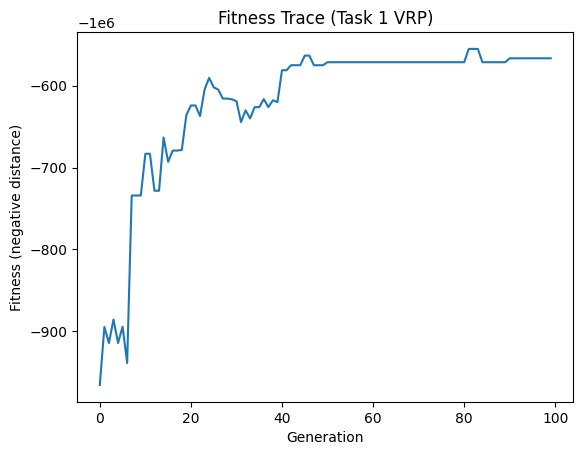

Best route: [13, 18, 10, 8, 14, 2, 1, 20, 11, 17, 5, 19, 15, 16, 4, 12, 3, 9, 7, 6]
Best distance: 1000566.6878214158


In [3]:
# ----------------------------
# Main GA loop
# ----------------------------
def simpleGA():
    population = [create_individual() for _ in range(POP_SIZE)]
    fitness_trend = []

    for gen in range(MAX_GENERATION):
        best = max(population, key=fitness)
        fitness_trend.append(fitness(best))

        new_population = []
        while len(new_population) < POP_SIZE:
            p1 = tournament_selection(population)
            p2 = tournament_selection(population)
            c1, c2 = crossover(p1, p2)
            new_population.append(mutate(c1))
            if len(new_population) < POP_SIZE:
                new_population.append(mutate(c2))
        population = new_population

    # Plot fitness trend
    plt.plot(fitness_trend)
    plt.title('Fitness Trace (Task 1 VRP)')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (negative distance)')
    plt.show()

    return best, -fitness(best)  # return route and distance

best_solution, best_distance = simpleGA()
print('Best route:', best_solution)
print('Best distance:', best_distance)
